<a href="https://colab.research.google.com/github/dgambone3/CSC6850_Machine_Learning_Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
### Run once to download dataset directly from Kaggle ###
# ! pip install -q kaggle
# ! mkdir ~/.kaggle
# ! cp /kaggle.json ~/.kaggle/
# ! chmod 600 ~/kaggle.json
# ! kaggle datasets download alexteboul/diabetes-health-indicators-dataset
# ! unzip diabetes-health-indicators-dataset.zip

In [11]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

# metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix



# processing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Diabetes Indicators Dataset/diabetes_012_health_indicators_BRFSS2015.csv')

In [13]:
X = df.iloc[:, 1:] # features
X = X.astype(int)
y = df.iloc[:, :1]
y = y.astype(int).values.ravel()

In [14]:
### REQUIRED MODELS ###
# 1) Decision Tree/Random Forest
# 2) Perceptron
# 3) Naive Bayes
# 4) Logistic Regression
# 5) Linear Regression
# 6) SVM - Linear Kernel
# 7) SVM - RBF kernel
# 8) Gradient Boosting
# 9) Multi-layer Perceptron (MLP)

 
titles = ['Decision Tree',
          'Perceptron',
          'Naive Bayes',
          'Logistic Regression',
          'Linear Regression',
          'SVM - Linear',
          'SVM - RBF',
          'Gradient Boost',
          'Muti-Layer Perceptron']


models = [DecisionTreeClassifier(criterion='gini', splitter='best'),
          Perceptron(),
          GaussianNB(),
          LogisticRegression(solver='liblinear'), 
          LinearRegression(),
          LinearSVC(dual=False),
          SVC(kernel='rbf'),
          GradientBoostingClassifier(),
          MLPClassifier(max_iter=500, hidden_layer_sizes=15)]

splits = [(0.5, 0.5), 
          (0.7, 0.3),
          (0.8, 0.2)]

In [15]:

X55_train, X55_test, y55_train, y55_test = train_test_split(X_train_temp, 
                                                        y_train_temp, 
                                                        train_size=.5, 
                                                        test_size=.5, 
                                                        shuffle=True,
                                                       random_state=1234)
X73_train, X73_test, y73_train, y73_test = train_test_split(X_train_temp, 
                                                        y_train_temp, 
                                                        train_size=.7, 
                                                        test_size=.3, 
                                                        shuffle=True,
                                                       random_state=1234)
X82_train, X82_test, y82_train, y82_test = train_test_split(X_train_temp, 
                                                        y_train_temp, 
                                                        train_size=.8, 
                                                        test_size=.2, 
                                                        shuffle=True,
                                                       random_state=1234)


train = [(X55_train, y55_train), 
          (X73_train, y73_train), 
          (X82_train, y82_train)]
test = [(X55_test, y55_test),
          (X73_test, y73_test),
          (X82_test, y82_test)]
index = []
for i in range(1,11):
  index.append(f'Fold {i}')
train_colors = ['navy', 'green', 'firebrick']
test_colors = ['skyblue', 'palegreen', 'salmon']
# split55_df = pd.DataFrame(columns=['model','accuracy''precision', 'recall'],
#                        index=index)
# split73_df = pd.DataFrame(columns=['model','accuracy''precision', 'recall'],
#                        index=index)
# split82_df = pd.DataFrame(columns=['model','accuracy''precision', 'recall'],
#                        index=index)

In [16]:
def get_learning_curve(model, X, y):
  scores=[]
  perc=[]
  for n in range(1,101):
    perc.append(n)
    XX = X.iloc[0:int(len(X) * (n/100))] #df
    yy = y[0:int(len(y) * (n/100))] #list
    pred = model.predict(XX)
    if 'LinearRegression' not in str(pipe.get_params):
      score = accuracy_score(y_true=yy, y_pred=pred)
    else:
      score = r2_score(y_true=yy, y_pred=pred)
    scores.append(score)
  return pd.DataFrame({'percent':perc, 'scores':scores})

Decision Tree
(0.5, 0.5)




,accuracy,precision,recall,f1-score
0,0.738583,0.772716,0.738583,0.754754
1,0.740157,0.768436,0.740157,0.753329
2,0.766562,0.767081,0.766562,0.766793
3,0.749211,0.767824,0.749211,0.758404
4,0.750789,0.753925,0.750789,0.752343
5,0.780757,0.793274,0.780757,0.786743
6,0.766562,0.782874,0.766562,0.774478
7,0.771293,0.779909,0.771293,0.775515
8,0.735016,0.776643,0.735016,0.753592
9,0.761830,0.776637,0.761830,0.768736


(0.7, 0.3)




,accuracy,precision,recall,f1-score
0,0.756757,0.763856,0.756757,0.760290
1,0.766892,0.776777,0.766892,0.771764
2,0.761261,0.785894,0.761261,0.772743
3,0.763514,0.787739,0.763514,0.774849
4,0.757883,0.771630,0.757883,0.764488
5,0.755631,0.771807,0.755631,0.763374
6,0.754505,0.773126,0.754505,0.763445
7,0.762387,0.784301,0.762387,0.772677
8,0.764374,0.773604,0.764374,0.768934
9,0.777903,0.791039,0.777903,0.784211


(0.8, 0.2)




,accuracy,precision,recall,f1-score
0,0.757635,0.782482,0.757635,0.769285
1,0.776355,0.790405,0.776355,0.783185
2,0.760591,0.783394,0.760591,0.771589
3,0.779310,0.786707,0.779310,0.782974
4,0.739901,0.759105,0.739901,0.749004
5,0.778325,0.792143,0.778325,0.784955
6,0.767488,0.783207,0.767488,0.774903
7,0.776134,0.779911,0.776134,0.778001
8,0.760355,0.778400,0.760355,0.768889
9,0.787968,0.799248,0.787968,0.793419


Perceptron
(0.5, 0.5)




,accuracy,precision,recall,f1-score
0,0.831496,0.771106,0.831496,0.787961
1,0.822047,0.765894,0.822047,0.786440
2,0.807571,0.781186,0.807571,0.793238
3,0.826498,0.806561,0.826498,0.816194
4,0.818612,0.766519,0.818612,0.783463
5,0.824921,0.778482,0.824921,0.792406
6,0.818612,0.798177,0.818612,0.801269
7,0.821767,0.750283,0.821767,0.776941
8,0.744479,0.810654,0.744479,0.771476
9,0.779180,0.774404,0.779180,0.775393


(0.7, 0.3)




,accuracy,precision,recall,f1-score
0,0.801802,0.761958,0.801802,0.778439
1,0.804054,0.798342,0.804054,0.801045
2,0.799550,0.753139,0.799550,0.762667
3,0.796171,0.775037,0.796171,0.785200
4,0.815315,0.757592,0.815315,0.778154
5,0.782658,0.785348,0.782658,0.783053
6,0.789414,0.744844,0.789414,0.763197
7,0.824324,0.791490,0.824324,0.803191
8,0.804961,0.798062,0.804961,0.800905
9,0.812852,0.786145,0.812852,0.798656


(0.8, 0.2)




,accuracy,precision,recall,f1-score
0,0.767488,0.778008,0.767488,0.772643
1,0.769458,0.808686,0.769458,0.787931
2,0.798030,0.791548,0.798030,0.794677
3,0.826601,0.774521,0.826601,0.788294
4,0.824631,0.781650,0.824631,0.793664
5,0.757635,0.800254,0.757635,0.775827
6,0.822660,0.761110,0.822660,0.784822
7,0.816568,0.816375,0.816568,0.815536
8,0.802761,0.775757,0.802761,0.788613
9,0.816568,0.782611,0.816568,0.797938


Naive Bayes
(0.5, 0.5)




,accuracy,precision,recall,f1-score
0,0.735433,0.808953,0.735433,0.760354
1,0.724409,0.798656,0.724409,0.752043
2,0.753943,0.818572,0.753943,0.775185
3,0.766562,0.835148,0.766562,0.788424
4,0.730284,0.800344,0.730284,0.756259
5,0.736593,0.808548,0.736593,0.760926
6,0.755521,0.814169,0.755521,0.774976
7,0.766562,0.829925,0.766562,0.788468
8,0.723975,0.798851,0.723975,0.750188
9,0.720820,0.806372,0.720820,0.749956


(0.7, 0.3)




,accuracy,precision,recall,f1-score
0,0.769144,0.829614,0.769144,0.789112
1,0.765766,0.815284,0.765766,0.783726
2,0.750000,0.816404,0.750000,0.772469
3,0.745495,0.813875,0.745495,0.770014
4,0.745495,0.809776,0.745495,0.768231
5,0.755631,0.822388,0.755631,0.779372
6,0.739865,0.808988,0.739865,0.763172
7,0.754505,0.811203,0.754505,0.774034
8,0.754228,0.817309,0.754228,0.776602
9,0.728298,0.810371,0.728298,0.756645


(0.8, 0.2)




,accuracy,precision,recall,f1-score
0,0.754680,0.806010,0.754680,0.773976
1,0.771429,0.828978,0.771429,0.791091
2,0.762562,0.813597,0.762562,0.781869
3,0.756650,0.824849,0.756650,0.780262
4,0.733005,0.799993,0.733005,0.758777
5,0.767488,0.832682,0.767488,0.789509
6,0.732020,0.804851,0.732020,0.758879
7,0.761341,0.814735,0.761341,0.779850
8,0.749507,0.816856,0.749507,0.773784
9,0.742604,0.812771,0.742604,0.767497


Logistic Regression
(0.5, 0.5)




,accuracy,precision,recall,f1-score
0,0.850394,0.804495,0.850394,0.810120
1,0.851969,0.808202,0.851969,0.819529
2,0.847003,0.800736,0.847003,0.811900
3,0.850158,0.808534,0.850158,0.819394
4,0.831230,0.766921,0.831230,0.789298
5,0.854890,0.818821,0.854890,0.814194
6,0.835962,0.782033,0.835962,0.797955
7,0.858044,0.819910,0.858044,0.824694
8,0.847003,0.794306,0.847003,0.802807
9,0.837539,0.782492,0.837539,0.797361


(0.7, 0.3)




,accuracy,precision,recall,f1-score
0,0.844595,0.799140,0.844595,0.810330
1,0.850225,0.806514,0.850225,0.805260
2,0.850225,0.808223,0.850225,0.815125
3,0.851351,0.808183,0.851351,0.817697
4,0.844595,0.800052,0.844595,0.812291
5,0.851351,0.807580,0.851351,0.817937
6,0.840090,0.787587,0.840090,0.798522
7,0.849099,0.806156,0.849099,0.816815
8,0.856821,0.820108,0.856821,0.822788
9,0.844419,0.794973,0.844419,0.806686


(0.8, 0.2)




,accuracy,precision,recall,f1-score
0,0.840394,0.782127,0.840394,0.797682
1,0.854187,0.813886,0.854187,0.818317
2,0.849261,0.802328,0.849261,0.806508
3,0.858128,0.819579,0.858128,0.824407
4,0.854187,0.813139,0.854187,0.822576
5,0.844335,0.799293,0.844335,0.813367
6,0.843350,0.790942,0.843350,0.803770
7,0.860947,0.825149,0.860947,0.825927
8,0.850099,0.805924,0.850099,0.814546
9,0.848126,0.799189,0.848126,0.808331


Linear Regression
(0.5, 0.5)




,accuracy,precision,recall,f1-score
0,0,0,0,0.174224
1,0,0,0,0.161672
2,0,0,0,0.172669
3,0,0,0,0.244018
4,0,0,0,0.120886
5,0,0,0,0.158171
6,0,0,0,0.162869
7,0,0,0,0.172277
8,0,0,0,0.183596
9,0,0,0,0.171374


(0.7, 0.3)




,accuracy,precision,recall,f1-score
0,0,0,0,0.193923
1,0,0,0,0.177396
2,0,0,0,0.175820
3,0,0,0,0.177849
4,0,0,0,0.164452
5,0,0,0,0.212167
6,0,0,0,0.138126
7,0,0,0,0.148181
8,0,0,0,0.199894
9,0,0,0,0.174525


(0.8, 0.2)




,accuracy,precision,recall,f1-score
0,0,0,0,0.140002
1,0,0,0,0.195665
2,0,0,0,0.173655
3,0,0,0,0.190918
4,0,0,0,0.158097
5,0,0,0,0.199550
6,0,0,0,0.152146
7,0,0,0,0.185987
8,0,0,0,0.161227
9,0,0,0,0.183242


SVM - Linear
(0.5, 0.5)




,accuracy,precision,recall,f1-score
0,0.853543,0.813584,0.853543,0.805061
1,0.848819,0.799345,0.848819,0.799920
2,0.843849,0.785367,0.843849,0.795743
3,0.853312,0.811787,0.853312,0.809258
4,0.842271,0.778973,0.842271,0.789305
5,0.847003,0.804867,0.847003,0.791286
6,0.842271,0.786285,0.842271,0.790512
7,0.850158,0.809235,0.850158,0.798158
8,0.845426,0.787092,0.845426,0.788981
9,0.842271,0.784760,0.842271,0.793049


(0.7, 0.3)




,accuracy,precision,recall,f1-score
0,0.851351,0.818603,0.851351,0.800720
1,0.847973,0.802616,0.847973,0.791869
2,0.852477,0.813595,0.852477,0.807315
3,0.850225,0.803686,0.850225,0.802255
4,0.843468,0.788159,0.843468,0.796086
5,0.854730,0.814934,0.854730,0.810712
6,0.837838,0.762104,0.837838,0.777679
7,0.849099,0.804757,0.849099,0.802307
8,0.844419,0.791293,0.844419,0.789214
9,0.844419,0.786364,0.844419,0.794905


(0.8, 0.2)




,accuracy,precision,recall,f1-score
0,0.840394,0.769488,0.840394,0.785417
1,0.854187,0.823082,0.854187,0.803469
2,0.846305,0.793046,0.846305,0.787044
3,0.857143,0.819950,0.857143,0.811239
4,0.851232,0.803021,0.851232,0.801028
5,0.846305,0.790962,0.846305,0.794622
6,0.851232,0.806431,0.851232,0.804273
7,0.851085,0.811792,0.851085,0.796607
8,0.844181,0.785798,0.844181,0.790137
9,0.851085,0.802846,0.851085,0.800837


SVM - RBF
(0.5, 0.5)




,accuracy,precision,recall,f1-score
0,0.850394,0.821490,0.850394,0.791687
1,0.847244,0.801342,0.847244,0.798037
2,0.853312,0.821859,0.853312,0.803118
3,0.845426,0.791518,0.845426,0.798259
4,0.847003,0.791347,0.847003,0.796995
5,0.848580,0.806361,0.848580,0.798775
6,0.847003,0.808128,0.847003,0.788951
7,0.843849,0.790897,0.843849,0.787026
8,0.848580,0.799321,0.848580,0.795436
9,0.848580,0.802425,0.848580,0.799191


(0.7, 0.3)




,accuracy,precision,recall,f1-score
0,0.845721,0.801894,0.845721,0.787560
1,0.847973,0.797888,0.847973,0.796961
2,0.849099,0.808909,0.849099,0.794932
3,0.851351,0.813990,0.851351,0.800981
4,0.847973,0.802299,0.847973,0.797275
5,0.847973,0.795916,0.847973,0.801056
6,0.849099,0.809862,0.849099,0.797707
7,0.845721,0.799727,0.845721,0.789234
8,0.845547,0.795773,0.845547,0.791534
9,0.851184,0.805626,0.851184,0.802214


(0.8, 0.2)




,accuracy,precision,recall,f1-score
0,0.839409,0.767180,0.839409,0.784837
1,0.851232,0.824035,0.851232,0.793066
2,0.852217,0.813487,0.852217,0.799762
3,0.849261,0.802792,0.849261,0.793662
4,0.852217,0.814272,0.852217,0.802167
5,0.848276,0.794504,0.848276,0.800372
6,0.850246,0.803812,0.850246,0.801111
7,0.855030,0.829616,0.855030,0.801947
8,0.849112,0.806971,0.849112,0.793159
9,0.850099,0.799751,0.850099,0.800201


Gradient Boost
(0.5, 0.5)




,accuracy,precision,recall,f1-score
0,0.839370,0.788327,0.839370,0.804379
1,0.845669,0.801548,0.845669,0.813546
2,0.835962,0.779218,0.835962,0.795770
3,0.848580,0.808640,0.848580,0.820208
4,0.835962,0.784553,0.835962,0.801896
5,0.859621,0.828386,0.859621,0.826698
6,0.851735,0.807616,0.851735,0.812589
7,0.858044,0.818393,0.858044,0.822146
8,0.853312,0.812078,0.853312,0.815995
9,0.829653,0.774415,0.829653,0.792308


(0.7, 0.3)




,accuracy,precision,recall,f1-score
0,0.850225,0.807793,0.850225,0.809571
1,0.845721,0.797051,0.845721,0.805495
2,0.854730,0.816572,0.854730,0.816245
3,0.838964,0.791952,0.838964,0.807252
4,0.843468,0.796283,0.843468,0.808370
5,0.858108,0.820051,0.858108,0.827590
6,0.838964,0.789517,0.838964,0.802468
7,0.855856,0.814941,0.855856,0.818875
8,0.847802,0.806237,0.847802,0.812650
9,0.844419,0.794356,0.844419,0.806965


(0.8, 0.2)




,accuracy,precision,recall,f1-score
0,0.836453,0.780157,0.836453,0.796774
1,0.860099,0.826071,0.860099,0.822665
2,0.843350,0.789357,0.843350,0.800925
3,0.858128,0.818068,0.858128,0.824806
4,0.843350,0.795860,0.843350,0.810292
5,0.850246,0.808379,0.850246,0.820219
6,0.850246,0.809720,0.850246,0.817852
7,0.862919,0.829261,0.862919,0.827404
8,0.857002,0.818344,0.857002,0.821466
9,0.844181,0.792829,0.844181,0.804987


Muti-Layer Perceptron
(0.5, 0.5)




,accuracy,precision,recall,f1-score
0,0.840945,0.796294,0.840945,0.809782
1,0.837795,0.791323,0.837795,0.807214
2,0.845426,0.802441,0.845426,0.814723
3,0.847003,0.807541,0.847003,0.820802
4,0.832808,0.779765,0.832808,0.797800
5,0.840694,0.790421,0.840694,0.804786
6,0.850158,0.809245,0.850158,0.819478
7,0.839117,0.795479,0.839117,0.809718
8,0.850158,0.804855,0.850158,0.814897
9,0.843849,0.803873,0.843849,0.817561


(0.7, 0.3)




,accuracy,precision,recall,f1-score
0,0.842342,0.795831,0.842342,0.807396
1,0.838964,0.788517,0.838964,0.802437
2,0.854730,0.816753,0.854730,0.825511
3,0.838964,0.791073,0.838964,0.806765
4,0.847973,0.803380,0.847973,0.813967
5,0.853604,0.815263,0.853604,0.825747
6,0.838964,0.787668,0.838964,0.800174
7,0.854730,0.814871,0.854730,0.824110
8,0.847802,0.804763,0.847802,0.814063
9,0.839910,0.793060,0.839910,0.807889


(0.8, 0.2)




,accuracy,precision,recall,f1-score
0,0.831527,0.774222,0.831527,0.793800
1,0.853202,0.811499,0.853202,0.813609
2,0.840394,0.787806,0.840394,0.803121
3,0.853202,0.812820,0.853202,0.823541
4,0.840394,0.784523,0.840394,0.799933
5,0.854187,0.814934,0.854187,0.823576
6,0.845320,0.801103,0.845320,0.813166
7,0.855030,0.814004,0.855030,0.819684
8,0.849112,0.805019,0.849112,0.815930
9,0.850099,0.806595,0.850099,0.816143


,model,split,f1_average
0,Decision Tree,"(0.8, 0.2)",0.775620
1,Perceptron,"(0.8, 0.2)",0.789995
2,Naive Bayes,"(0.8, 0.2)",0.775549
3,Logistic Regression,"(0.8, 0.2)",0.813543
4,Linear Regression,"(0.7, 0.3)",0.176233
5,SVM - Linear,"(0.8, 0.2)",0.797467
6,SVM - RBF,"(0.8, 0.2)",0.797028
7,Gradient Boost,"(0.8, 0.2)",0.814739
8,Muti-Layer Perceptron,"(0.7, 0.3)",0.812806


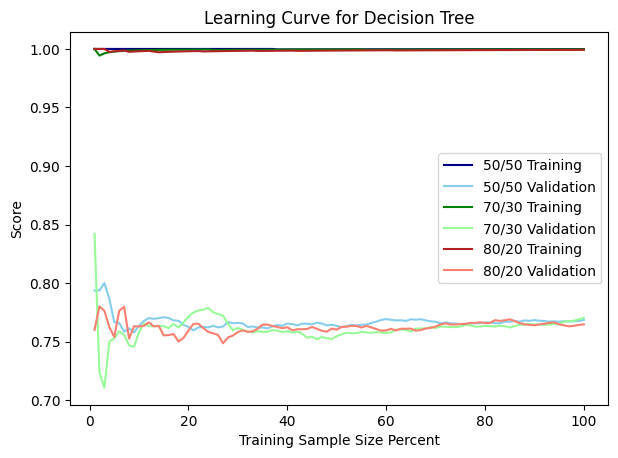

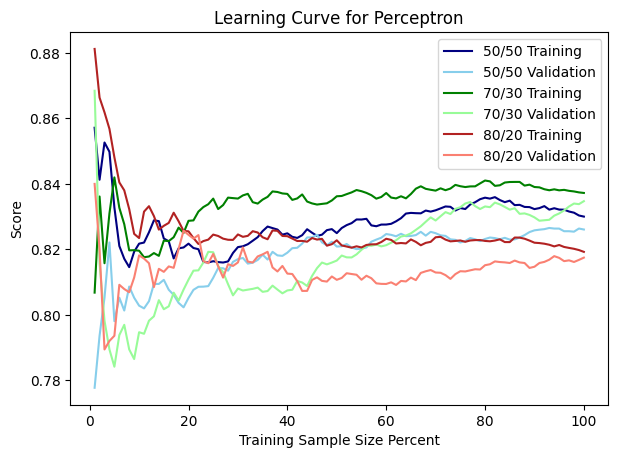

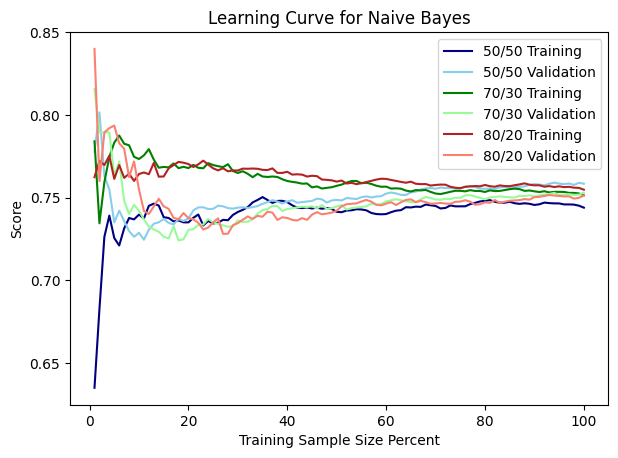

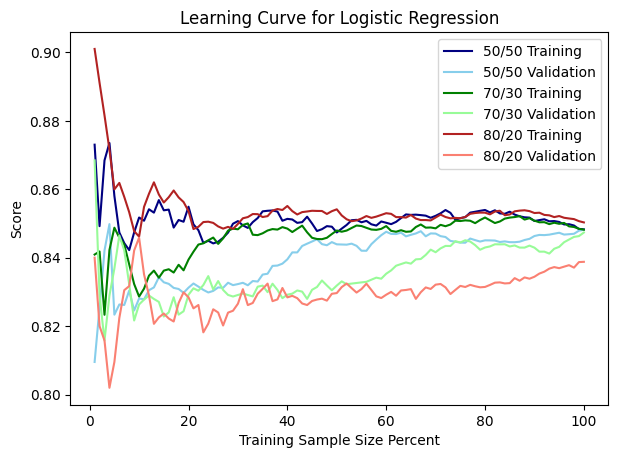

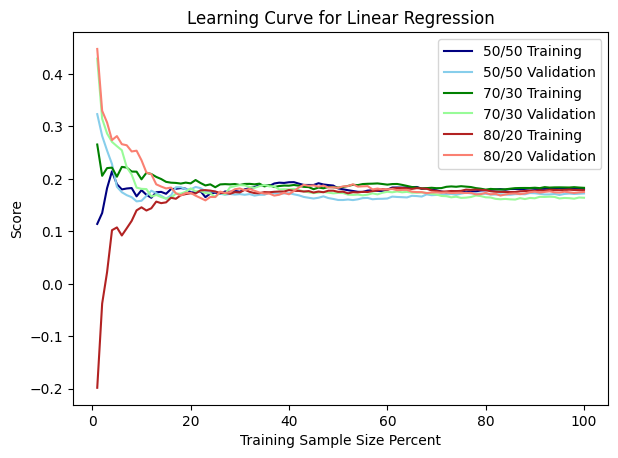

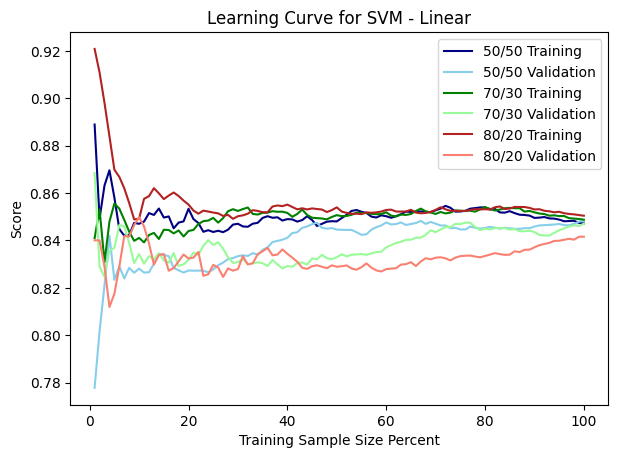

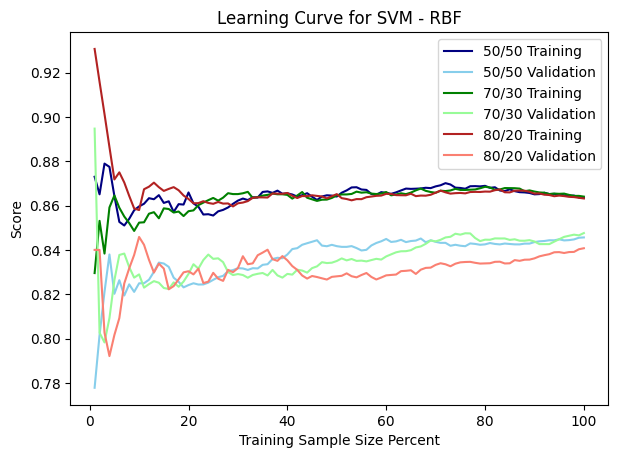

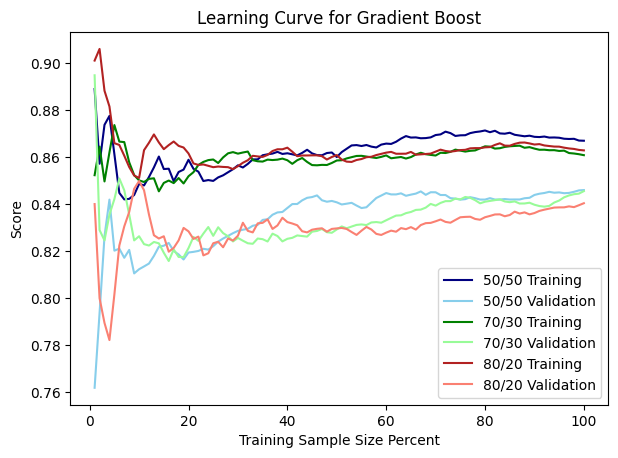

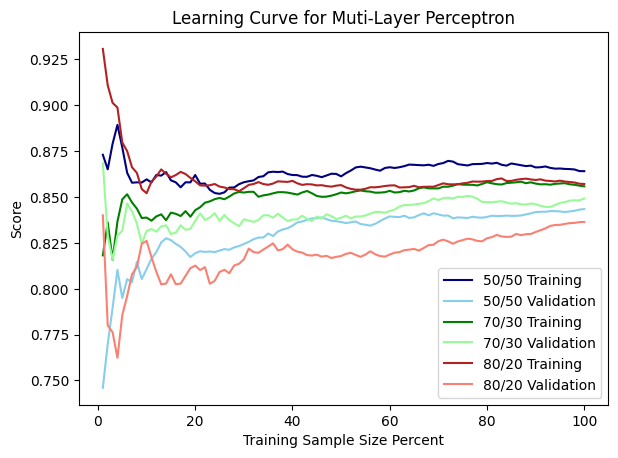

In [17]:

i = 0
# for each model
best_splits = pd.DataFrame(columns=['model', 'split', 'f1_average'])
for model in models:
    print(titles[i])
    if titles[i] != 'Linear Regression':
      pipe = make_pipeline(StandardScaler(), model)
    else: 
      pipe = model

    j=0
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    sample_df = pd.DataFrame(columns=['accuracy','precision', 'recall', 'f1-score'],
                              index=index)
    best_df = pd.DataFrame(columns=['model', 'split', 'f1_average'])
    
    for j in range(3): # each sample type
      pipe.fit(train[j][0], train[j][1])
      pred = pipe.predict(test[j][0])
      print(splits[j])
      # METRICS
      # print(classification_report(y_true=test[j][1], y_pred=pred, zero_division=0))
      scoring = {'accuracy' : make_scorer(accuracy_score), 
                  'precision' : make_scorer(precision_score, average='weighted', zero_division=0),
                  'recall' : make_scorer(recall_score, average='weighted'),
                  'f1-score': make_scorer(f1_score, average='weighted')}
      
      if titles[i] != 'Linear Regression':
        m = cross_validate(pipe, 
                          train[j][0], 
                          train[j][1],
                          scoring=scoring, 
                          cv=10)
        sample_df = pd.concat({'accuracy':pd.Series(m['test_accuracy']), 
                             'precision':pd.Series(m['test_precision']),
                             'recall':pd.Series(m['test_recall']),
                             'f1-score':pd.Series(m['test_f1-score'])}, 
                              axis=1)
      else:
        zero_series = pd.Series(0, index=[x for x in range(10)])
        m = cross_val_score(pipe, train[j][0], train[j][1], scoring='r2', cv=10)
        sample_df = pd.concat({'accuracy':zero_series, 
                              'precision':zero_series,
                              'recall':zero_series,
                              'f1-score':pd.Series(m)}, 
                                axis=1)
      best_df.loc[len(best_df)] = [titles[i], splits[j], sample_df['f1-score'].mean()]
      sample_df = sample_df.style.set_caption(f'Fold Metrics for {titles[i]} with {int(splits[j][0] * 100)}/{int(splits[j][1]*100)} Split')
      sample_df.index = index
      print('\n')
      display(sample_df)
      
      # LEARNING CURVES
      train_scores = get_learning_curve(pipe, train[j][0], train[j][1])
      test_scores = get_learning_curve(pipe, test[j][0], test[j][1])


      ax.plot(train_scores['percent'], 
              train_scores['scores'], 
              color=train_colors[j],
              label=f'{int(splits[j][0] * 100)}/{int(splits[j][1]*100)} Training')
      ax.plot(test_scores['percent'], 
              test_scores['scores'], 
              color=test_colors[j],
              label=f'{int(splits[j][0] * 100)}/{int(splits[j][1]*100)} Validation')
      ax.set_xlabel('Training Sample Size Percent')
      ax.set_ylabel('Score')
      ax.set_title(f'Learning Curve for {titles[i]}')
      ax.legend()
      # plt.xlim([0,100])
      # plt.ylim([0.7, 1.0])
      fig.tight_layout(pad=1.5)
      fig.show()

      j += 1

    max = best_df[best_df['f1_average'] == best_df['f1_average'].max()]
    
    best_splits = pd.concat([best_splits,max], ignore_index=True)
    
    
    i+=1  


best_splits = best_splits.style.set_caption(f'Best Split for Each Model')
display(best_splits)